<a href="https://colab.research.google.com/github/Taskeen009/major_project_final_year/blob/master/Breast_cancer02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**BREAST CANCER PREDICTION**

**I. Importing essential libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC


**II. Importing and understanding our dataset**

In [ ]:
cancer_data = pd.read_csv('/content/cancer.csv')

Printing out a few columns

In [ ]:
# print first 5 rows of the dataset
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#print last five rows of dataset
cancer_data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
print(cancer_data)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [ ]:
#number of rows and columns in the dataset
cancer_data.shape

(569, 33)

In [ ]:
#getting some info about the data
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
cancer_data = cancer_data.drop(columns=['Unnamed: 32'])

In [ ]:
cancer_data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

*We have no value missing*

Description

In [ ]:
cancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


NOW WE WILL ANALYSE THE TARGET VALUE

In [ ]:
print(cancer_data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [ ]:
target_col = cancer_data['diagnosis']

In [ ]:
cancer_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

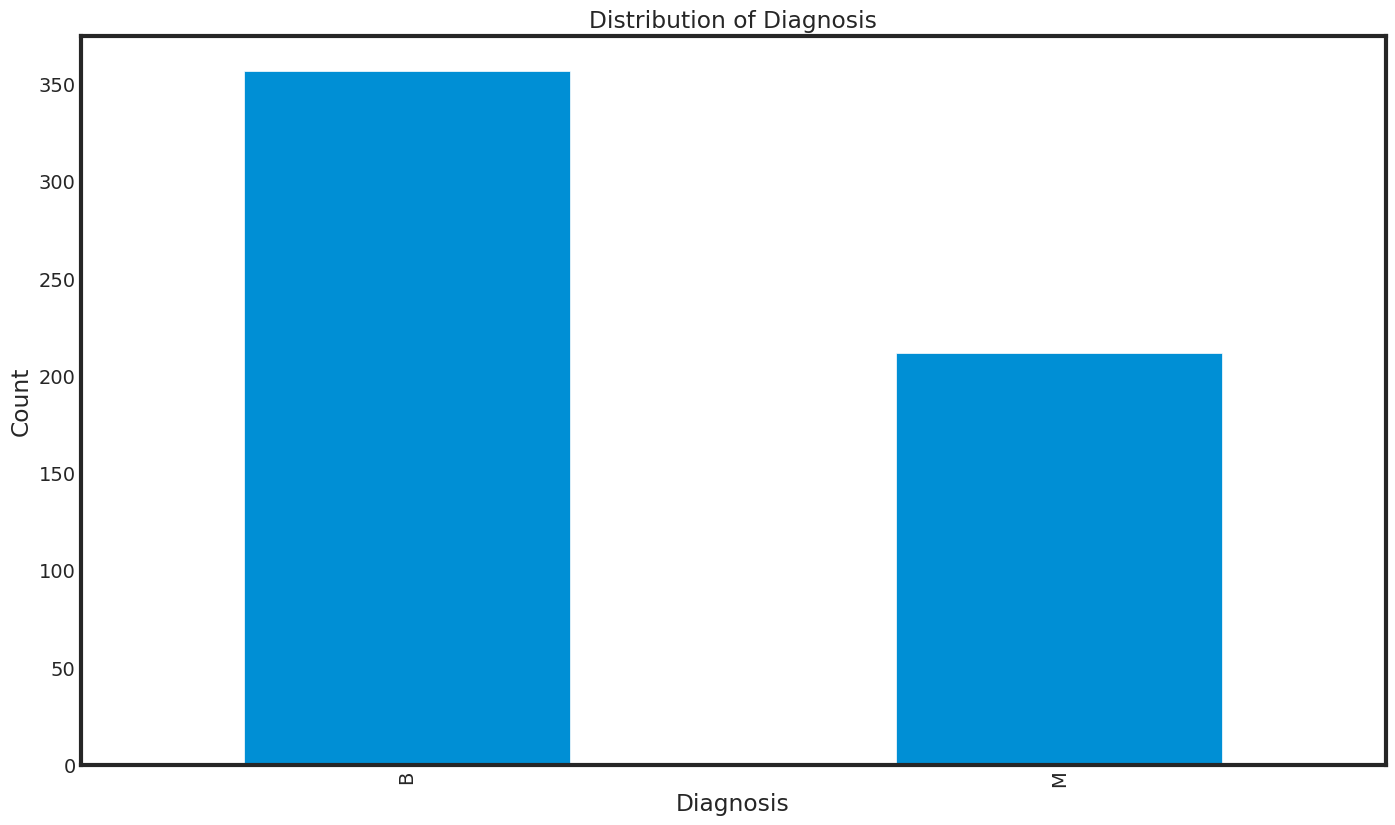

In [ ]:
# Get the value counts of the diagnosis column
value_counts = cancer_data['diagnosis'].value_counts()
# Create a bar plot of the value counts
ax = value_counts.plot.bar()
# Set the title and axis labels
ax.set_title('Distribution of Diagnosis')
ax.set_xlabel('Diagnosis')
ax.set_ylabel('Count')
# Show the plot
plt.show()

In [ ]:
cancer_data["diagnosis"].describe()

count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

In [ ]:
cancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
cancer_data["diagnosis"].unique()

array(['M', 'B'], dtype=object)

**Checking correlation between columns**

In [ ]:
dataset=cancer_data.corr()
print(dataset)

                               id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se                0.143048     0.

In [ ]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
cancer_data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
cancer_data.shape

(569, 32)

In [ ]:
cancer_data.skew()

id                         6.473752
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

In [ ]:
cancer_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

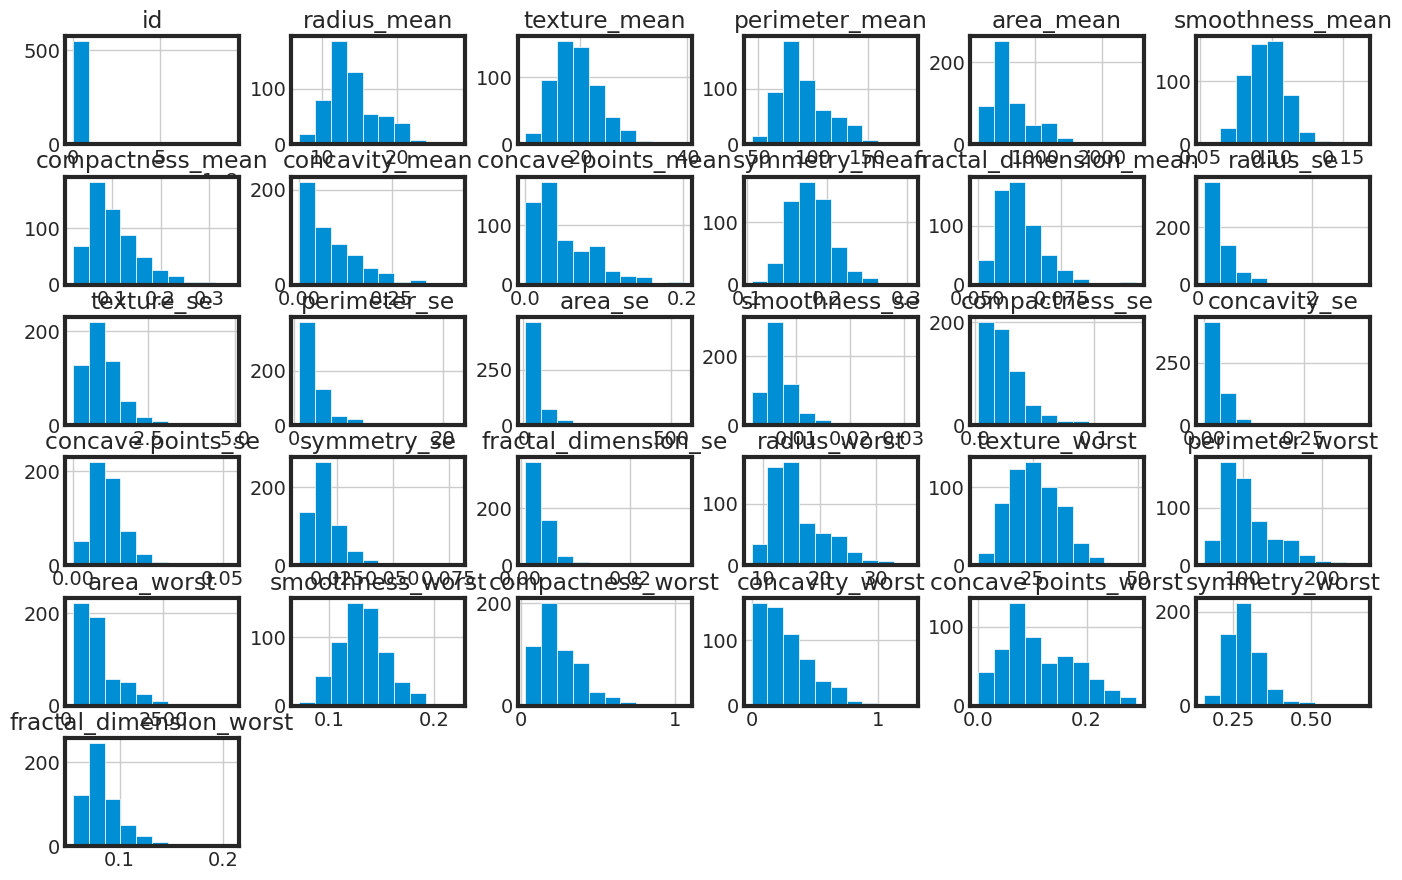

In [ ]:
cancer_data.hist(bins=10, figsize=(15, 10))
plt.show()

In [ ]:
df_id_diag = cancer_data.loc[:, ["id", "diagnosis"]]
df_diag = cancer_data.loc[:, ["diagnosis"]]
df_mean = cancer_data.iloc[:, 2:11]
df_se = cancer_data.iloc[:, 12:22]
df_worst = cancer_data.iloc[:, 22:]
print(df_id_diag.columns)

Index(['id', 'diagnosis'], dtype='object')


In [ ]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


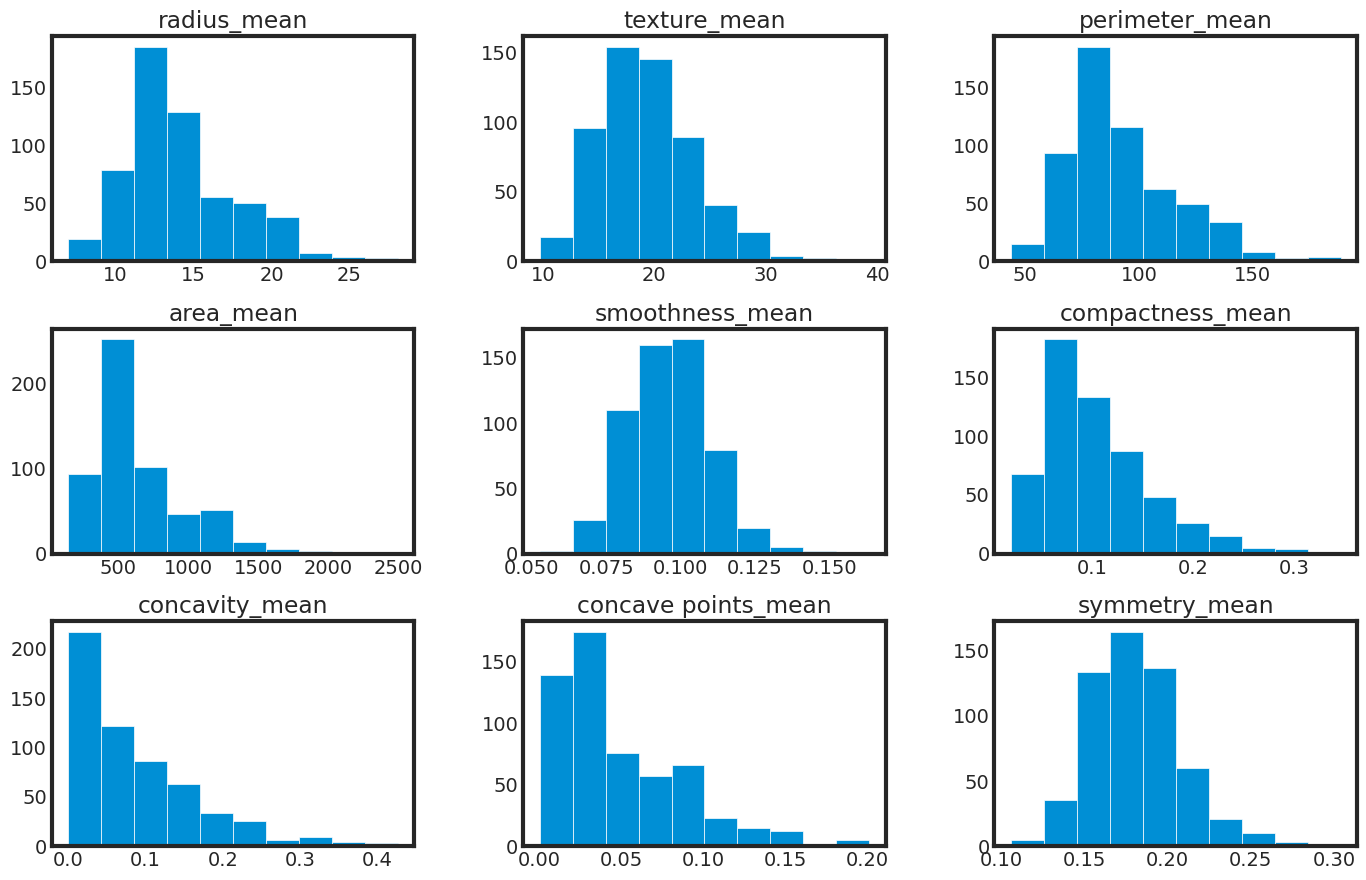

In [ ]:
#Plot histograms of CUT1 variables
hist_mean=df_mean.hist(bins=10, figsize=(15, 10),grid=False,)
#Any individual histograms, use this:
#df_cut['radius_worst'].hist(bins=100)

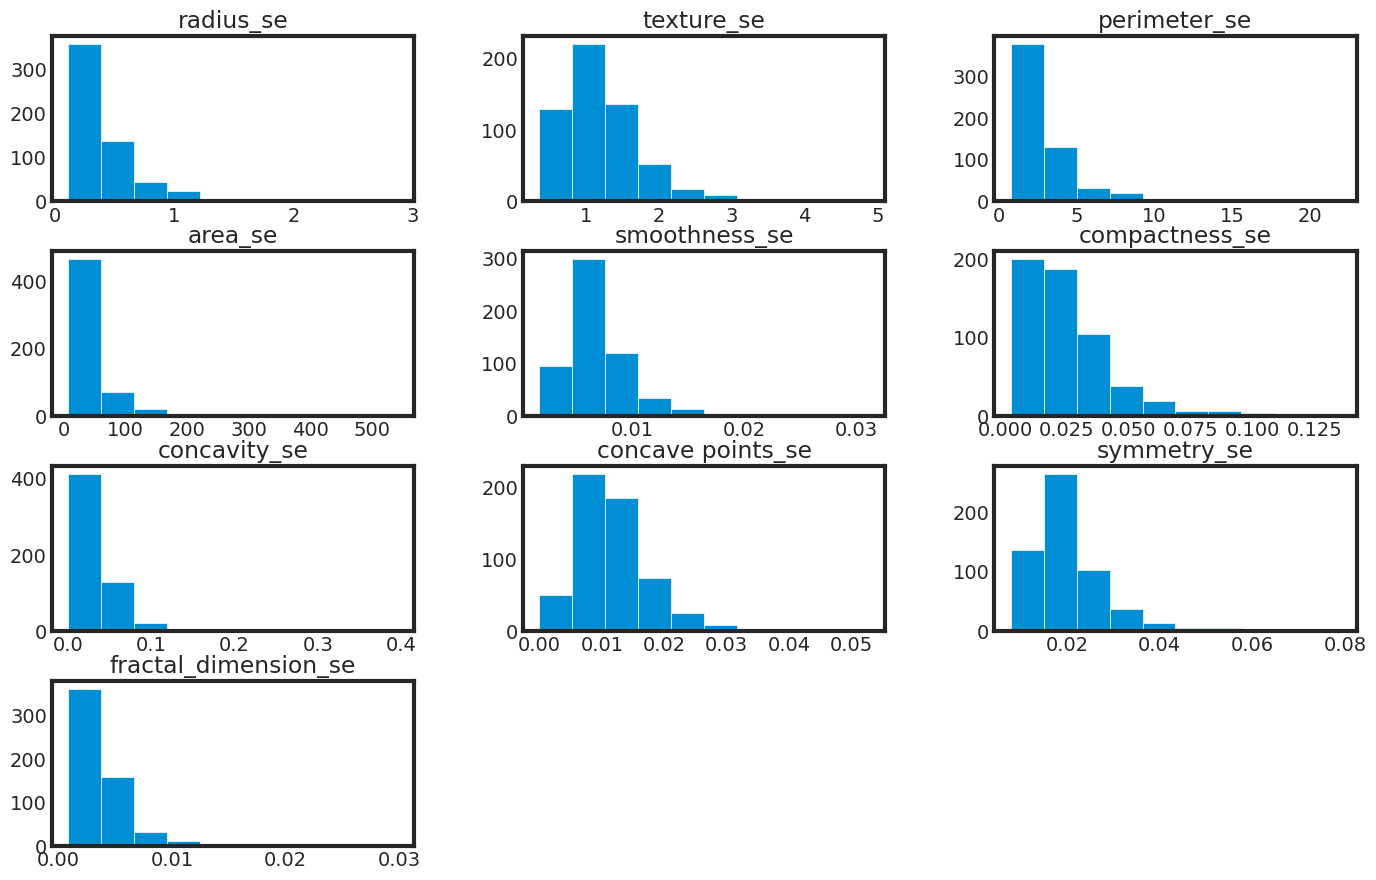

In [ ]:
#Plot histograms of _se variables
hist_se=df_se.hist(bins=10, figsize=(15, 10),grid=False,)

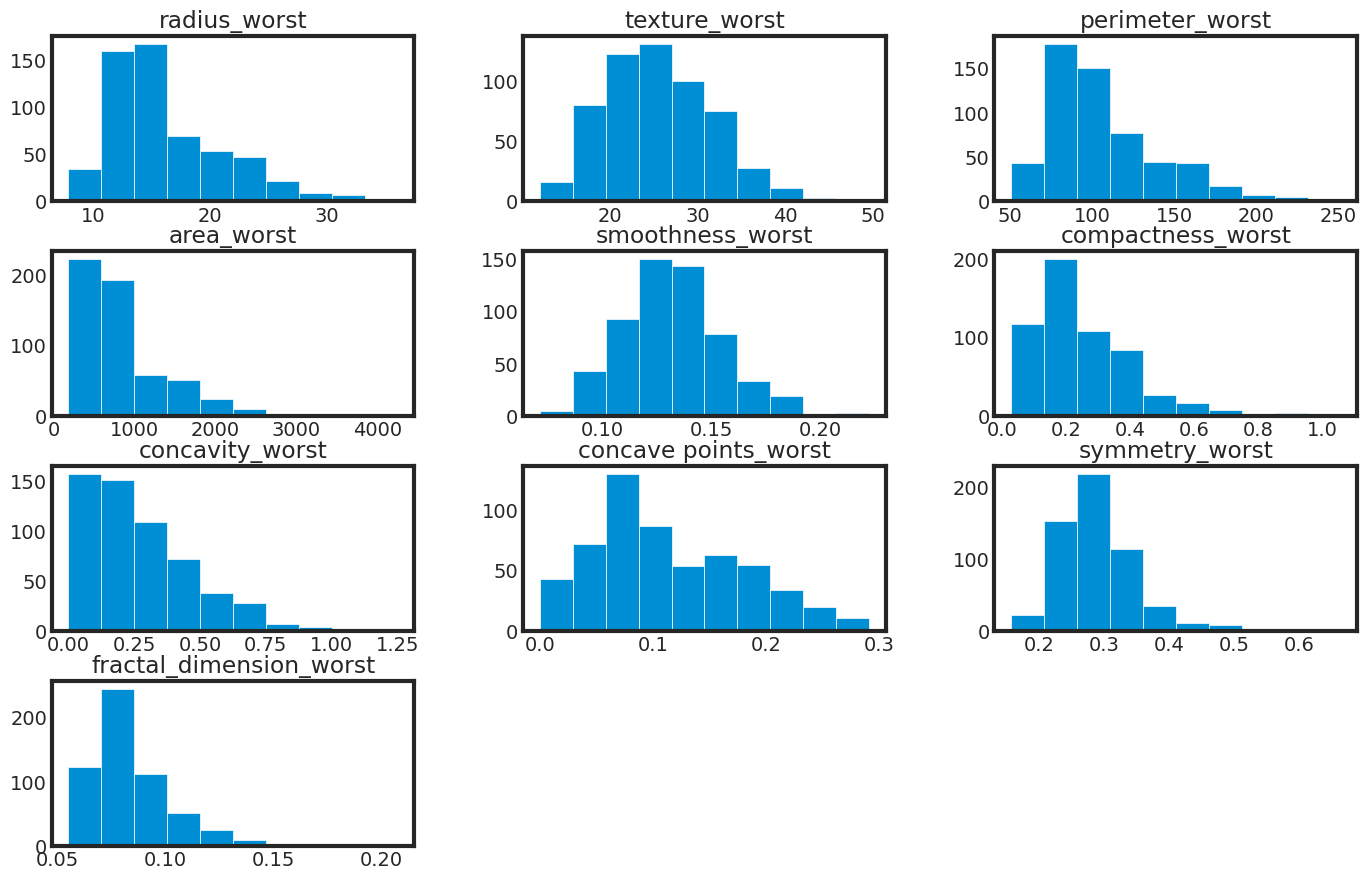

In [ ]:
#Plot histograms of _worst variables
hist_worst=df_worst.hist(bins=10, figsize=(15, 10),grid=False,)

**Observation**

We can see that there may be an exponential distribution for the properties concavity and concavity_point. ( ). Additionally, we can see that the symmetry, smoothness, and texture characteristics may have a Gaussian or nearly Gaussian distribution. This is intriguing because the input variables are typically assumed to have a Gaussian univariate distribution by many machine learning approaches.

**Density plots _mean suffix designition**

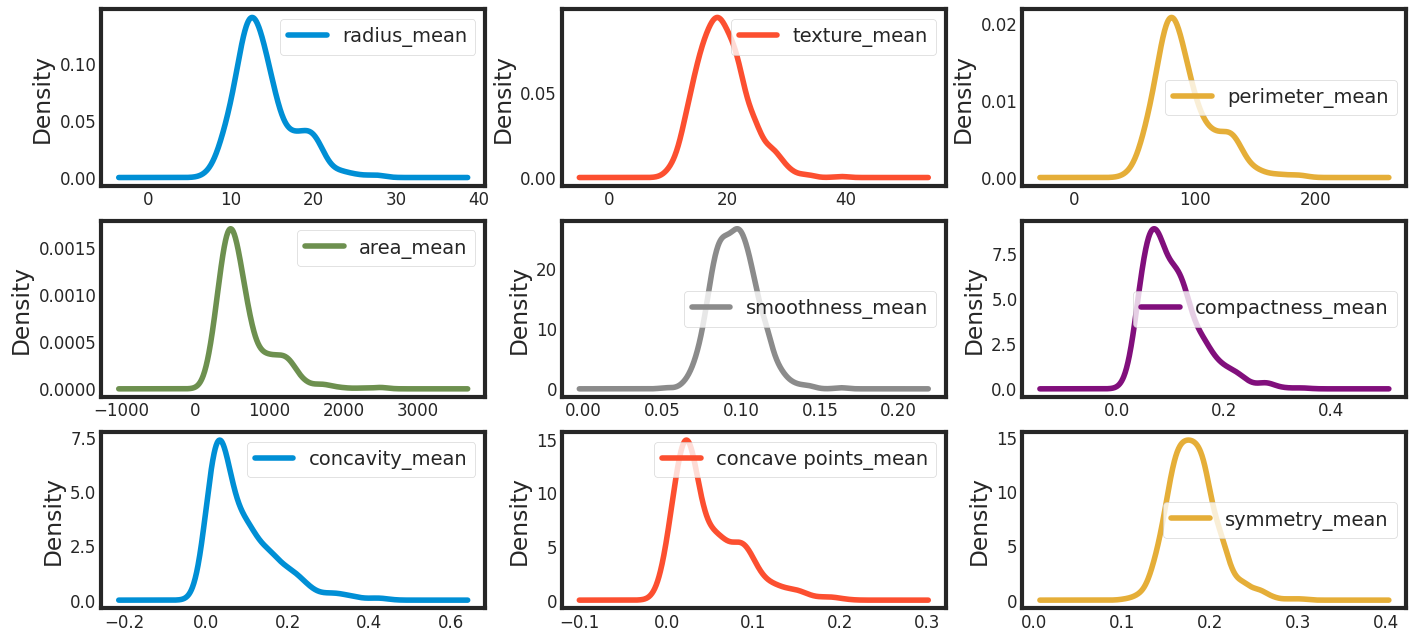

In [ ]:
plt = df_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False, fontsize=12, figsize=(15,10))

**Density plots _se suffix designition**

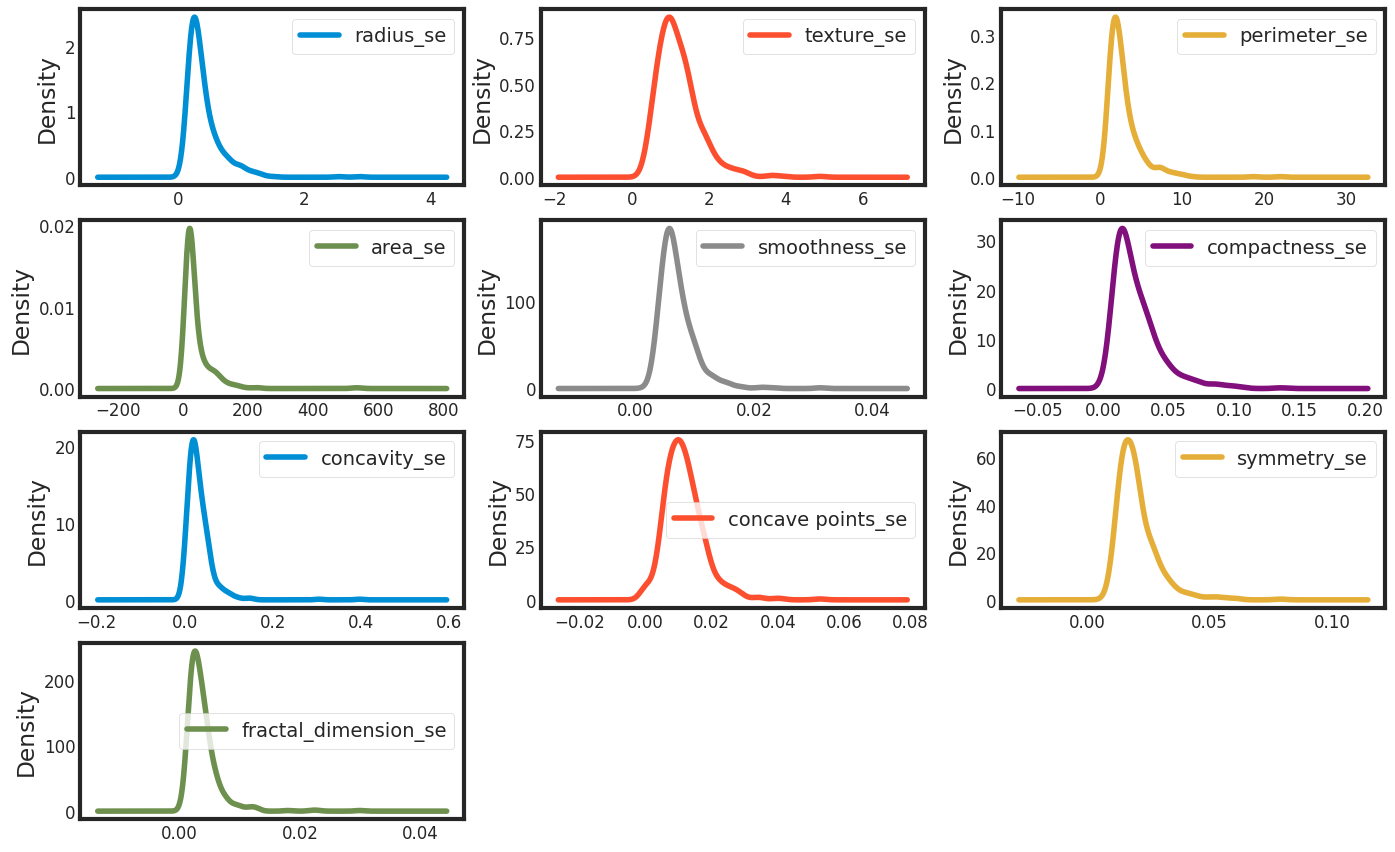

In [ ]:
plt = df_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                    sharey=False, fontsize=12, figsize=(15,10))

**Density plot _worst suffix designition**

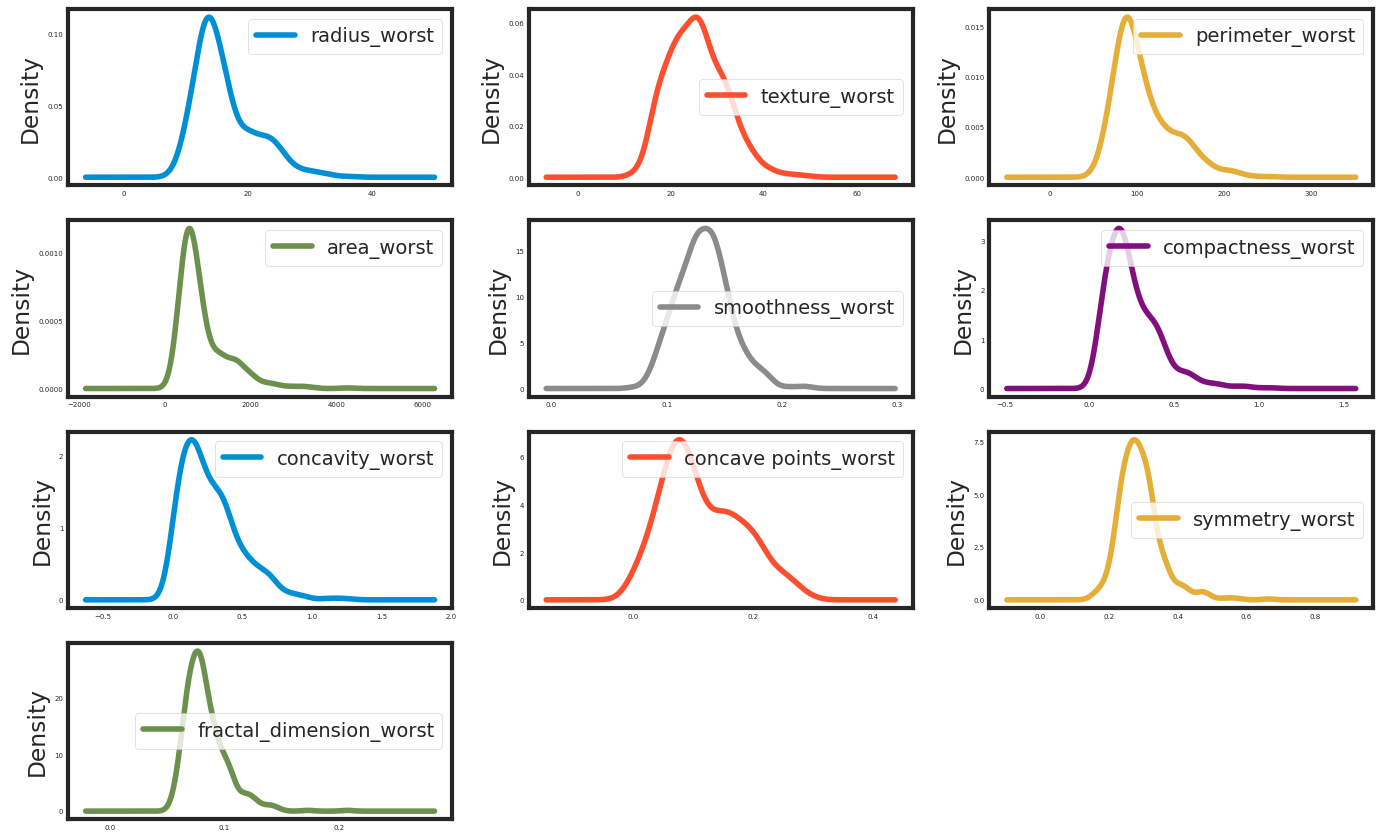

In [ ]:
plt = df_worst.plot(kind= 'kde', subplots=True, layout=(4,3), sharex=False, sharey=False, 
                    fontsize=5, figsize=(15,10))

**Observation**

The properties perimeter, radius, area, concavity, and compactness may have an exponential distribution, as may be seen.( ). Additionally, we can see that the symmetry, smoothness, and texture characteristics may have a Gaussian or nearly Gaussian distribution. This is intriguing because the input variables are typically assumed to have a Gaussian univariate distribution by many machine learning approaches.

**Correaltion**

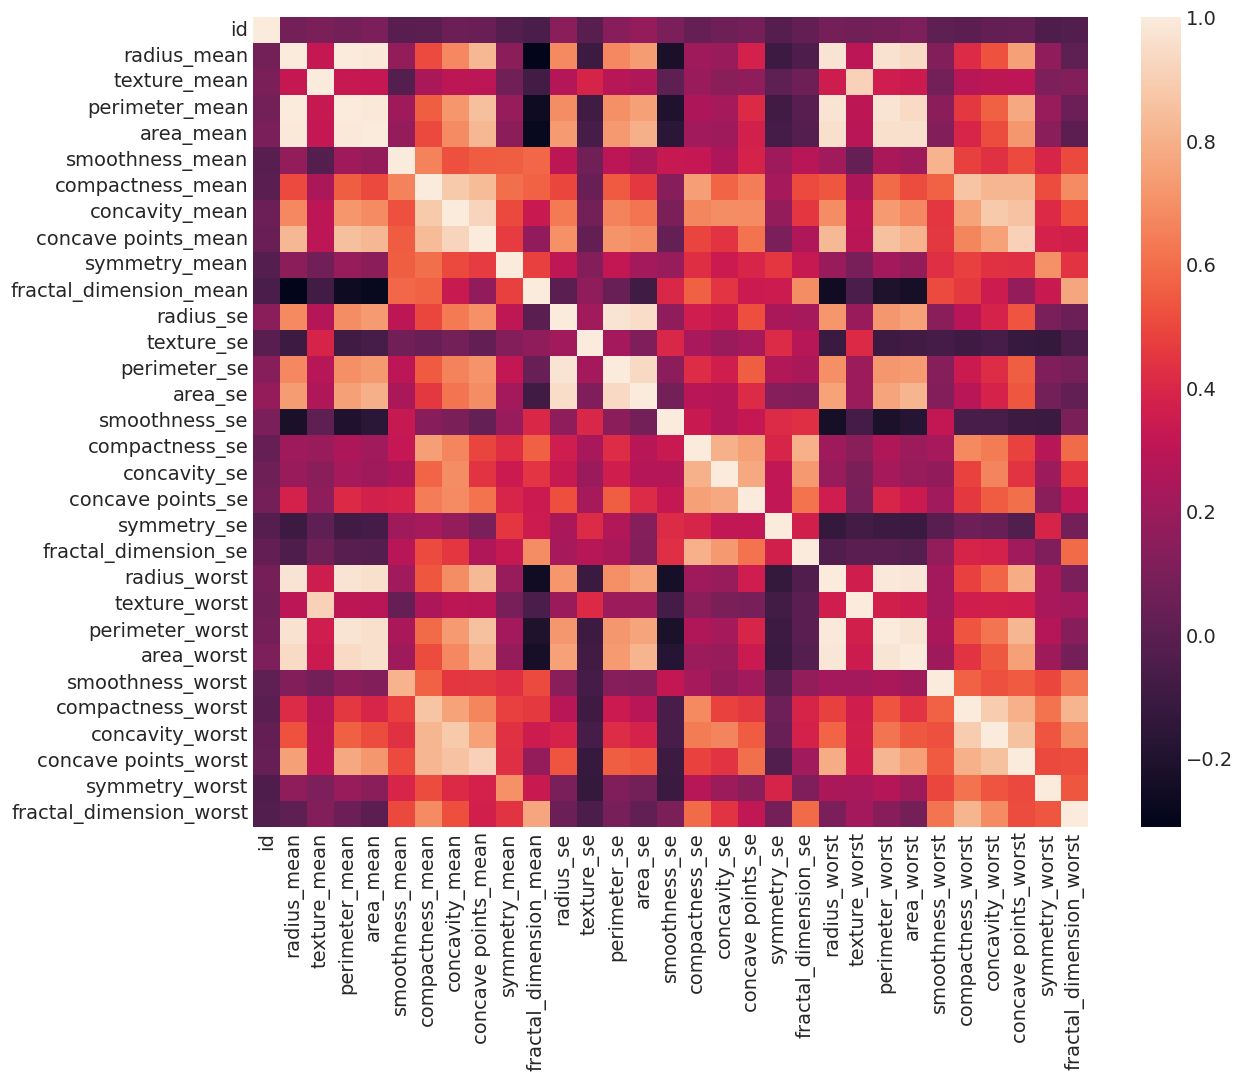

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cancer_data.corr(), ax=ax)
plt.show()

**Observation:**

We can see strong positive relationship exists with mean values paramaters between 1 to 0.75.

The mean area of the tissue nucleus has a strong positive correlation with mean values of radius and parameter;
Some paramters are moderately positive corrlated (r between 0.5-0.75)are concavity and area, concavity and perimeter etc
Likewise, we see some strong negative correlation between fractal_dimension with radius, texture, parameter mean values.

diagnosis
B    357
M    212
dtype: int64


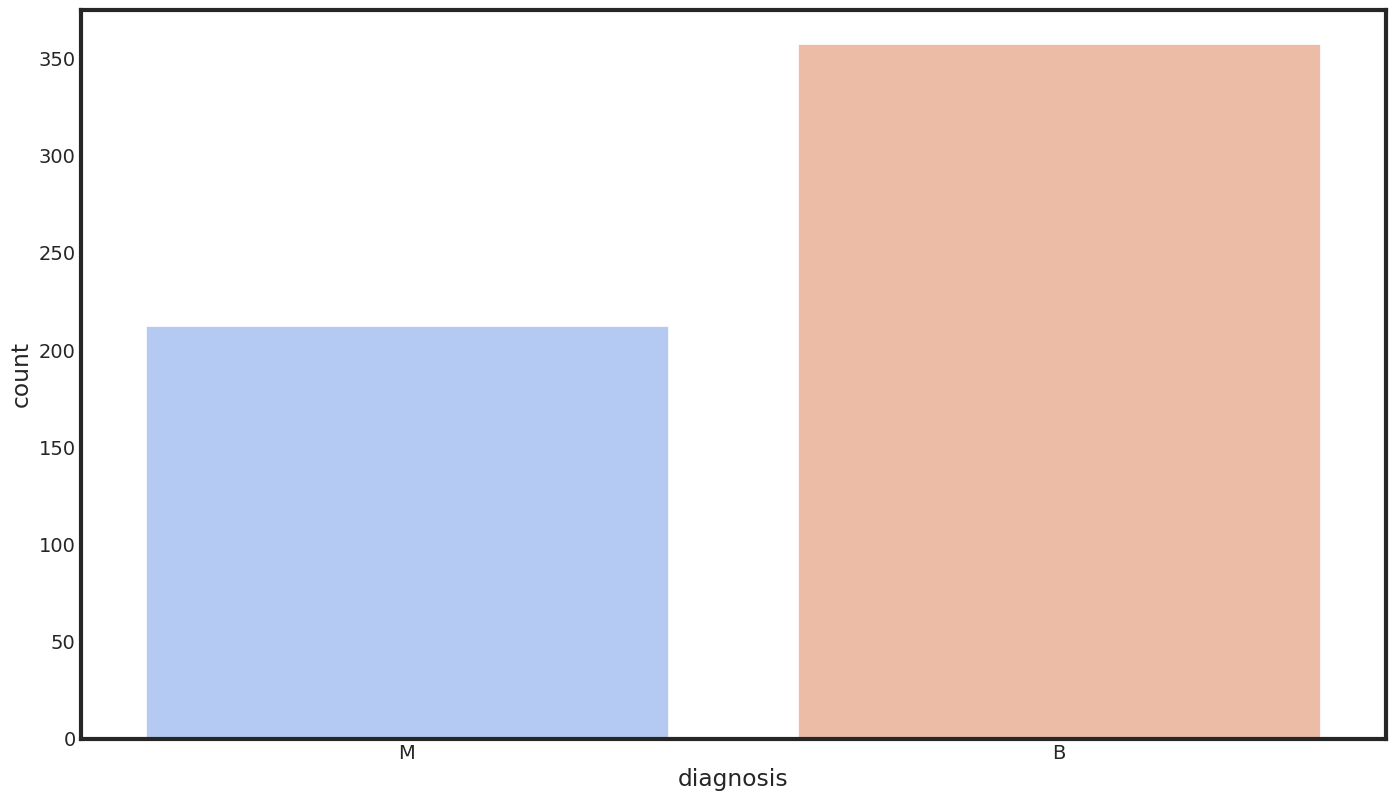

In [ ]:
print(cancer_data.groupby('diagnosis').size())
sns.countplot(x='diagnosis', data=cancer_data, palette='coolwarm')
plt.show()

**Visualise distribution of data via box plots**

**Box plot _mean suffix designition**

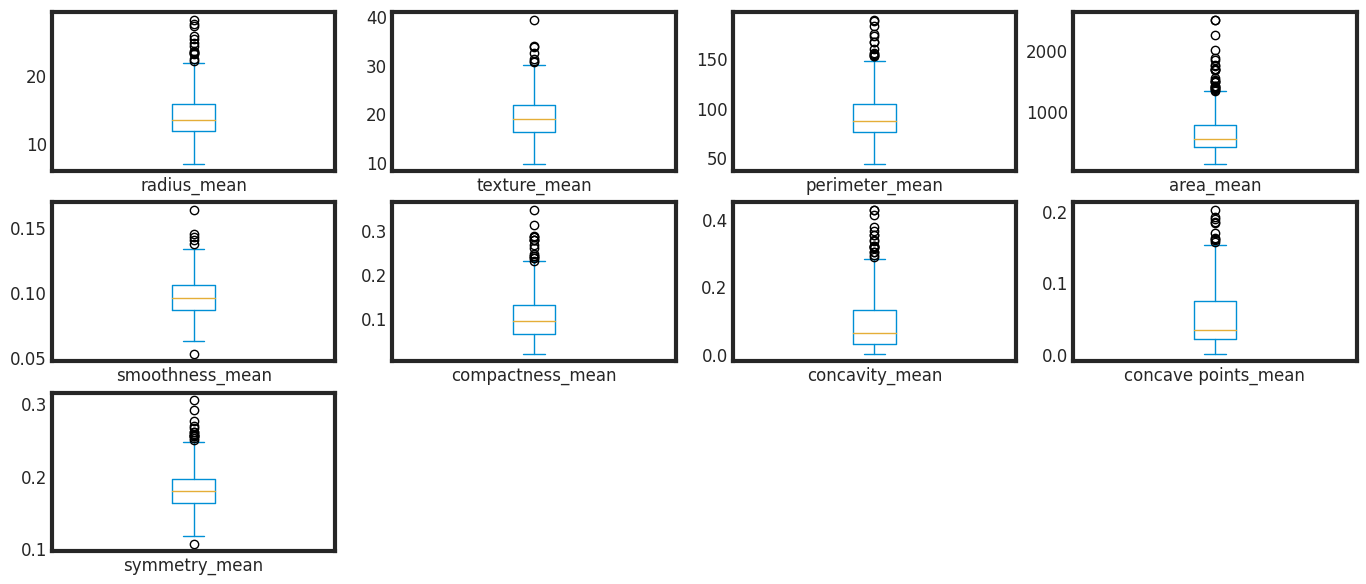

In [ ]:
plt=df_mean.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,
                 fontsize=12)

**Box plot _se suffix designition**

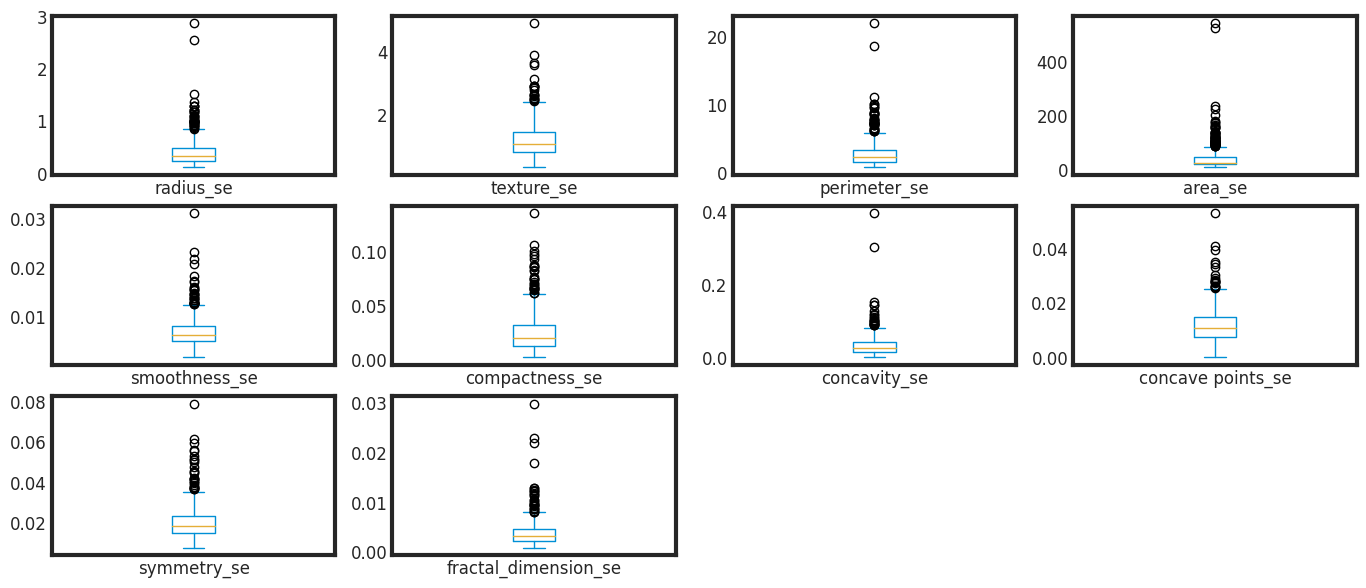

In [ ]:
plt=df_se.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False, 
               fontsize=12)

**Box plot _worst suffix designition**

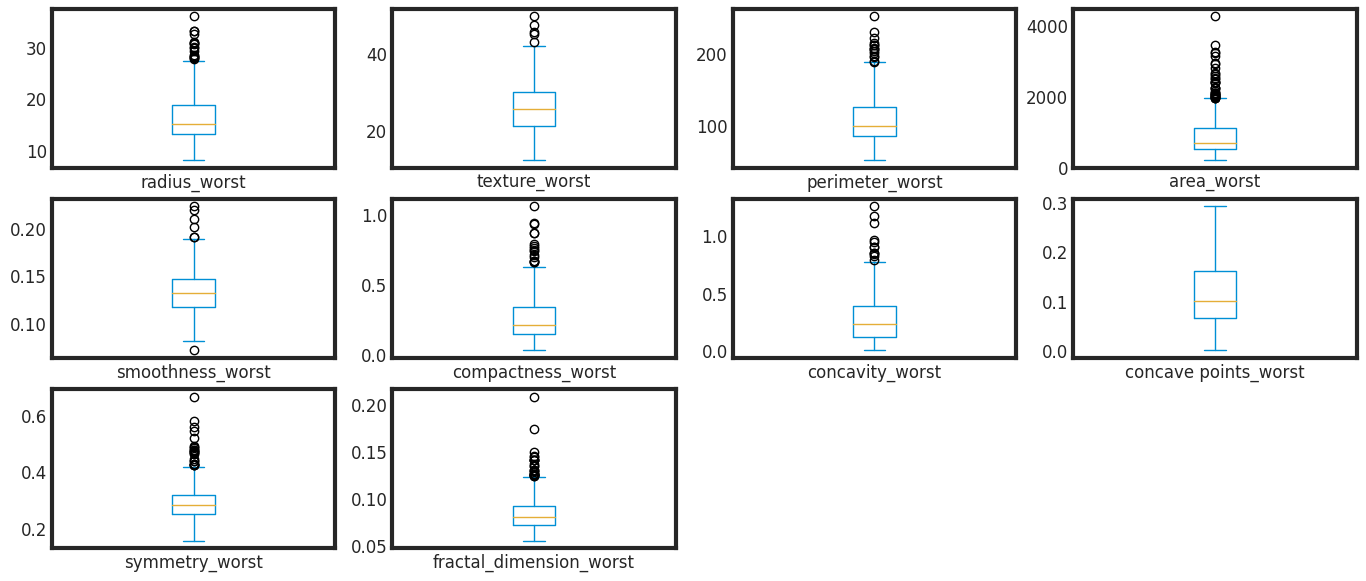

In [ ]:
plt=df_worst.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False, 
                  fontsize=12)

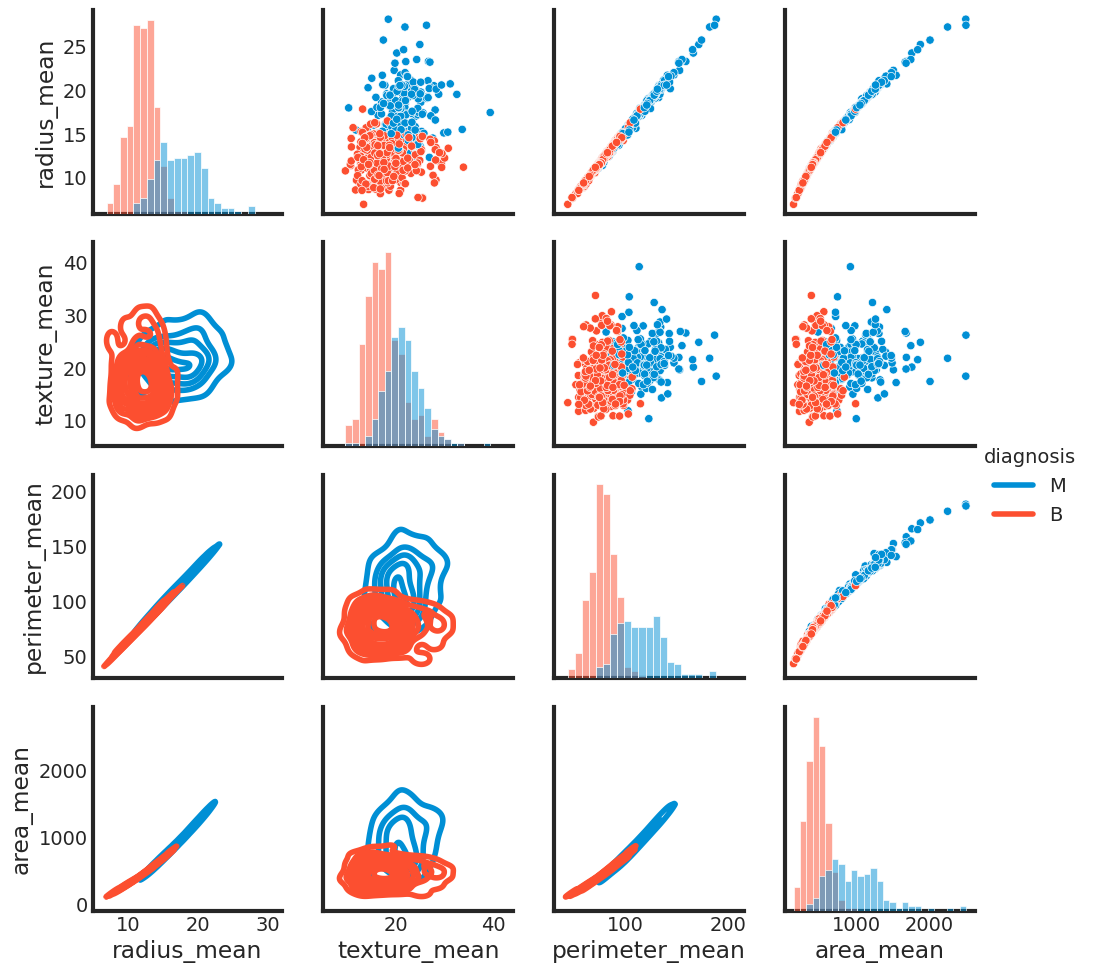

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
sns.set_style("white")
g = sns.PairGrid(cancer_data[[cancer_data.columns[1],cancer_data.columns[2], cancer_data.columns[3], 
                              cancer_data.columns[4],cancer_data.columns[5]]], hue="diagnosis", diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)
g.add_legend()
plt.show()

In [ ]:
Q1 = cancer_data.quantile(0.25)
Q3 = cancer_data.quantile(0.75)
inter_quartile_range = Q3 - Q1

In [ ]:
df_out = cancer_data[~((cancer_data < (Q1 - (1.5 * inter_quartile_range))) | (cancer_data > (Q3 + (1.5 * inter_quartile_range)))).any(axis=1)]
cancer_data.shape, df_out.shape

((569, 32), (346, 32))

In [ ]:
cancer_data = cancer_data.drop('id', axis=1)

**SPILLTING THE DATA INTO TRAINING & TESTING DATA**

In [ ]:
X = cancer_data.drop(columns='diagnosis',axis=1)
Y = cancer_data['diagnosis']
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (398, 30) (171, 30)


**Feature decomposition using Principal Component Analysis (PCA)**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
fit = pca.fit(Xs)

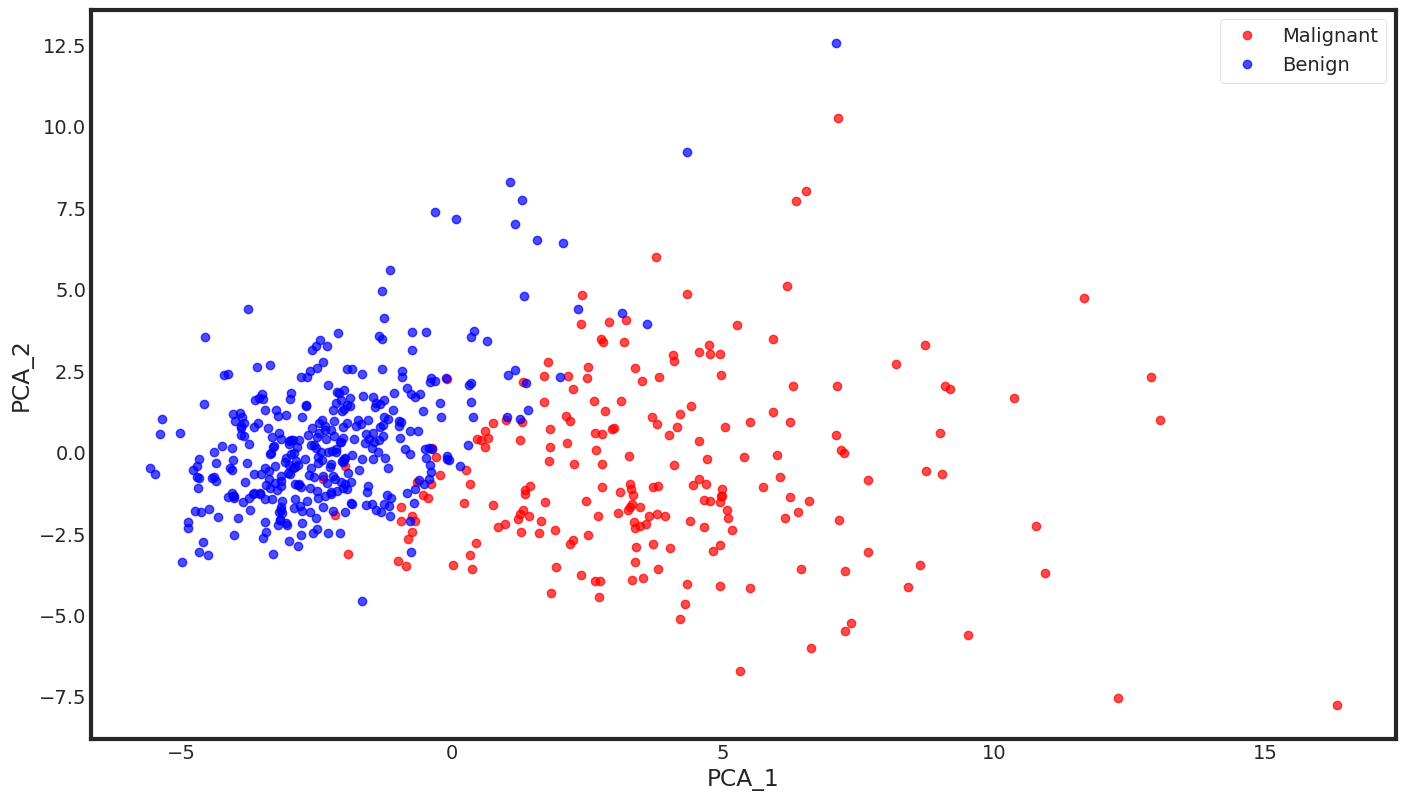

In [ ]:
X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][cancer_data.diagnosis == 'M'],PCA_df['PCA_2'][cancer_data.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][cancer_data.diagnosis == 'B'],PCA_df['PCA_2'][cancer_data.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

**Label encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [ ]:
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [ ]:
unique_values = np.unique(Y)
print(unique_values)

[0 1]


In [ ]:
print(cancer_data.columns)
cancer_data = cancer_data.drop('diagnosis', axis=1)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [ ]:
print(cancer_data.columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


**MODEL TRAINING**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Xs, Y, test_size=0.3, random_state=2, stratify=Y)

In [ ]:
clf = SVC(probability=True)
clf.fit(X_train, Y_train)
test_score = clf.score(X_test, Y_test)
print('\n➔ The classifier accuracy score on testing data is {:.2f}\n'.format(test_score))
train_score = clf.score(X_train, Y_train)
print('\n➔ The classifier accuracy score on training data is {:.2f}\n'.format(train_score))


➔ The classifier accuracy score on testing data is 0.95


➔ The classifier accuracy score on training data is 0.99



In [ ]:
# Get average of 3-fold cross-validation score using an SVC estimator.
n_folds = 3
cv_error = np.average(cross_val_score(SVC(), Xs, Y, cv=n_folds))
print ('\n➔ The {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))


➔ The 3-fold cross-validation accuracy score for this classifier is 0.97



In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
clf2 = make_pipeline(SelectKBest(f_regression, k=3),SVC(probability=True))
scores = cross_val_score(clf2, Xs, Y, cv=3)
n_folds = 3
cv_error = np.average(cross_val_score(SVC(), Xs, Y, cv=n_folds))
print ('\n➔ The {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))


➔ The 3-fold cross-validation accuracy score for this classifier is 0.97



In [ ]:
print (scores)
avg = (100*np.mean(scores), 100*np.std(scores)/np.sqrt(scores.shape[0]))
print ("➔ Average score and uncertainty: (%.2f +- %.3f)%%"%avg)

[0.93157895 0.95263158 0.94179894]
➔ Average score and uncertainty: (94.20 +- 0.496)%


In [ ]:
from sklearn.metrics import classification_report
clf = SVC(probability=True)
clf.fit(X_train, Y_train)
X_test_prediction = clf.predict(X_test)
class_report = classification_report(Y_test, X_test_prediction)
print("Classification report:")
print(class_report)

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       107
           1       0.98      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
Y_pred = clf.fit(X_train, Y_train).predict(X_test)
cm = metrics.confusion_matrix(Y_test, Y_pred)
print(cm)

[[106   1]
 [  7  57]]


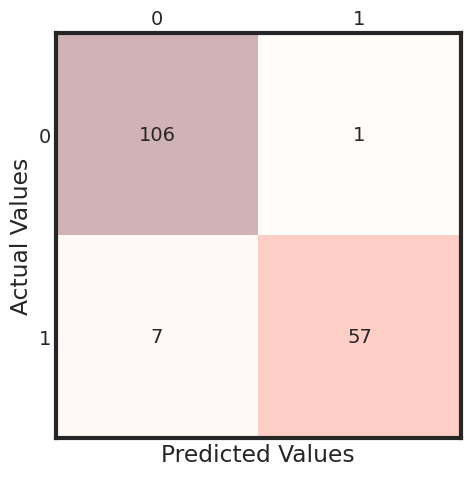

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       107
           1       0.98      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image, display
cm = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
# Display the classification report
print("Classification report:")
print(class_report)

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
linear_svc = LinearSVC()
clf = CalibratedClassifierCV(linear_svc)
clf.fit(X_train, Y_train)
probas_ = clf.predict_proba(X_test)

Text(0.5, 1.0, 'Receiver operating characteristic example')

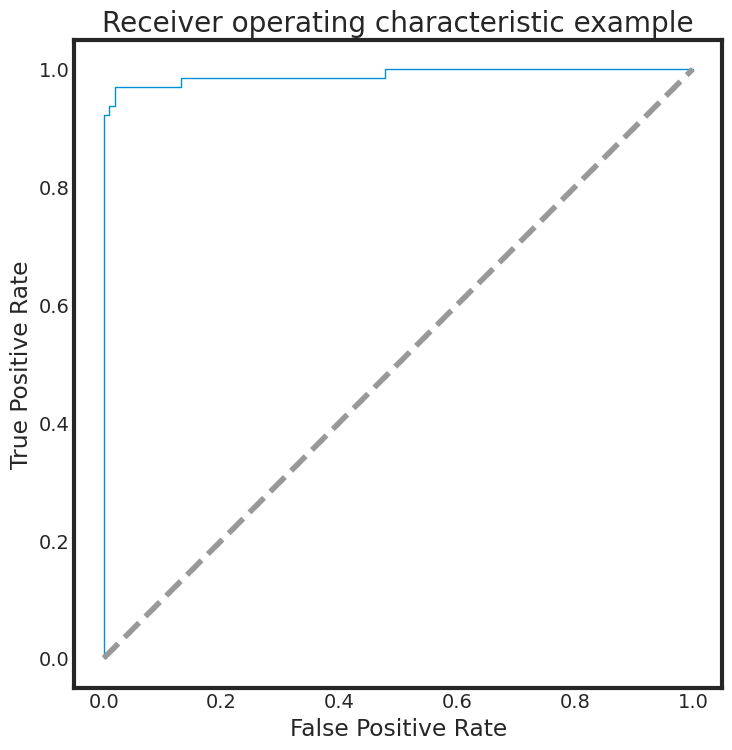

In [ ]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(10,8))
plt.axes().set_aspect(1)
probas_ = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, probas_)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')

In [ ]:
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")
plt.rcParams['figure.figsize'] = (8,4) 


The classifier accuracy score is 0.95

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       107
           1       0.98      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



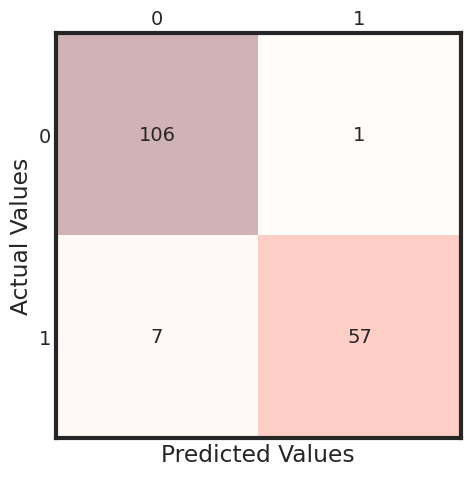

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
fit = pca.fit(Xs)
X_pca = pca.transform(Xs)
clf = SVC(probability=True)
clf.fit(X_train, Y_train)
classifier_score = clf.score(X_test, Y_test)
print ('\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score))
clf2 = make_pipeline(SelectKBest(f_regression, k=3),SVC(probability=True))
scores = cross_val_score(clf2, X_pca, Y, cv=3)
n_folds = 5
cv_error = np.average(cross_val_score(SVC(), X_pca, Y, cv=n_folds))
#print ('\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))
y_pred = clf.fit(X_train, Y_train).predict(X_test)
cm = metrics.confusion_matrix(Y_test, y_pred)
print(classification_report(Y_test, y_pred ))
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

**Decision boundaries of different classifiers**

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm, datasets
def decision_plot(X_train, Y_train, n_neighbors, weights):
       h = .02  # step size in the mesh

Xtrain = X_train[:, :2] # we only take the first two features.

#================================================================
# Create color maps
#================================================================
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


#================================================================
# we create an instance of SVM and fit out data. 
# We do not scale ourdata since we want to plot the support vectors
#================================================================

C = 1.0  # SVM regularization parameter

svm = SVC(kernel='linear', random_state=0, gamma=0.1, C=C).fit(Xtrain, Y_train)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(Xtrain, Y_train)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(Xtrain, Y_train)

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9) 
plt.rcParams['axes.titlesize'] = 'large'    
    # create a mesh to plot in
x_min, x_max = Xtrain[:, 0].min() - 1, Xtrain[:, 0].max() + 1
y_min, y_max = Xtrain[:, 1].min() - 1, Xtrain[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

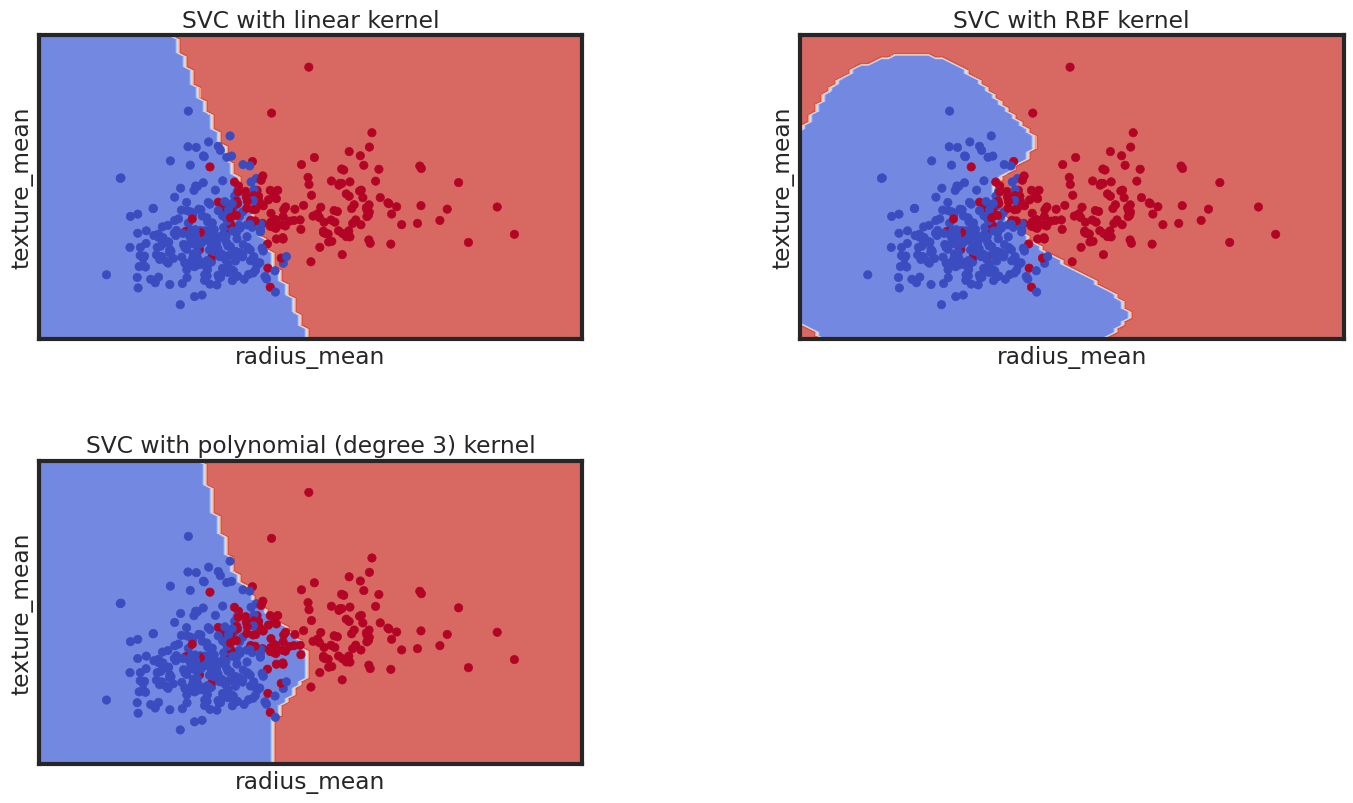

In [ ]:
for i, clf in enumerate((svm, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # Plot also the training points
    plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=Y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy of training data is', training_data_accuracy)
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy of test data is', test_data_accuracy)

Accuracy of training data is 0.9899497487437185
Accuracy of test data is 0.9707602339181286


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
classifier = LogisticRegression()
parameters = {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50], 'max_iter': [100, 200, 300]}
classifier_regressor = GridSearchCV(classifier, param_grid=parameters, scoring='accuracy', cv=5)
classifier_regressor.fit(X_train, Y_train)
print(classifier_regressor.best_params_)
print(classifier_regressor.best_score_)
Y_pred = classifier_regressor.predict(X_test)
score = accuracy_score(Y_pred, Y_test)
print("Test accuracy score:", score)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}
0.9748734177215189
Test accuracy score: 0.9707602339181286


In [ ]:
print('Classification accuracy:', model.score(X_test, Y_test))

Classification accuracy: 0.9707602339181286


In [ ]:
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
print("Confusion matrix:")
print(conf_matrix)

Confusion matrix:
[[106   1]
 [  4  60]]


ROC AUC: 0.9640771028037383


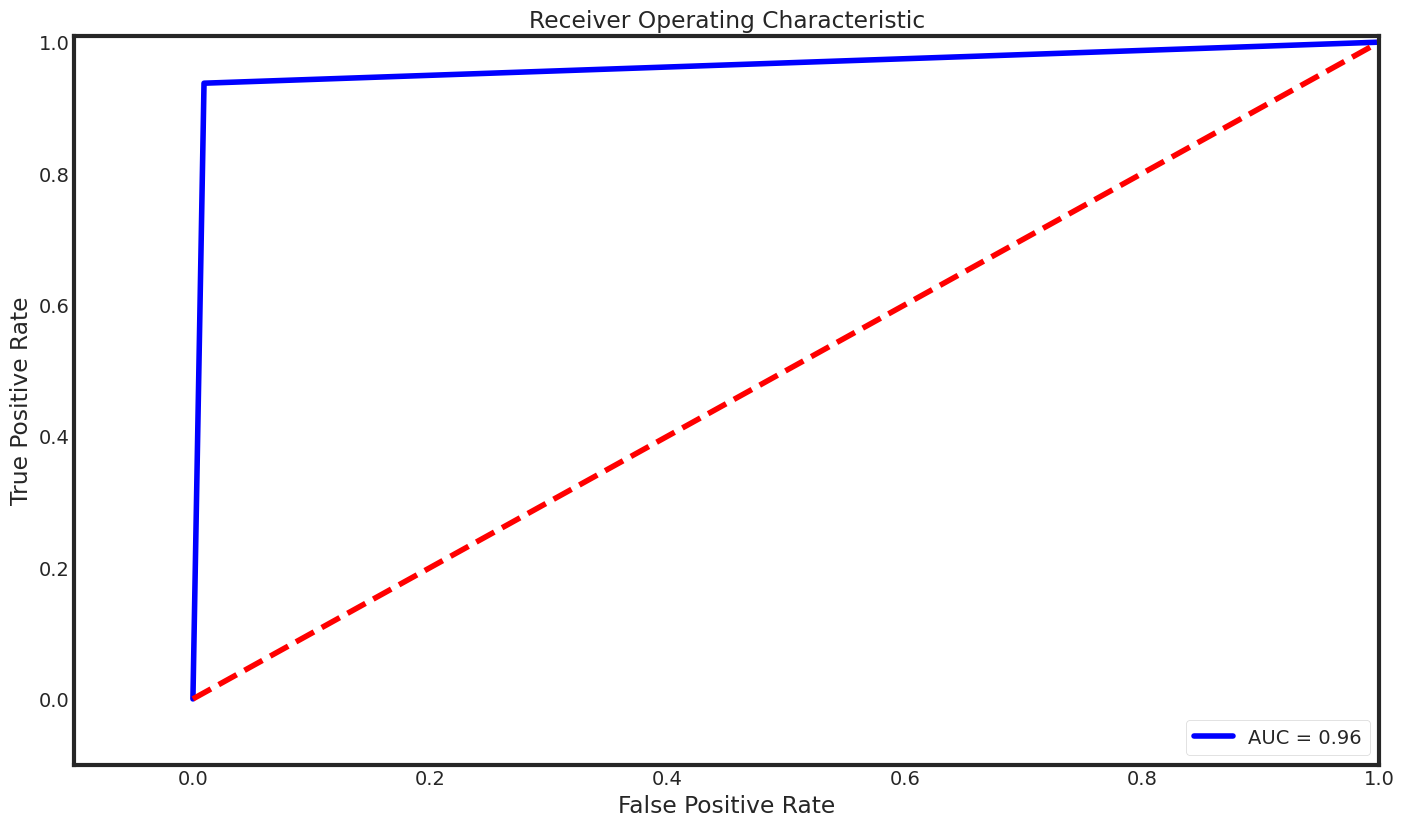

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, X_test_prediction)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
selectedFeatures = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
# convert string labels to numeric labels
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)
model = GaussianNB()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
ac = accuracy_score(Y_test, y_pred)
ac_train = accuracy_score(Y_train, y_pred_train)
roc = roc_auc_score(Y_test, y_pred)
print("Naive Bayes : ")
print("Training Set Accuracy : ", ac_train)
print("Test Set Accuracy: {0}, ROC: {1}".format(ac, roc))


Naive Bayes : 
Training Set Accuracy :  0.9522613065326633
Test Set Accuracy: 0.9181286549707602, ROC: 0.9000438084112149


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
accuracy_all_features = []
cv_all_features = []
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, Y, cv=10)
accuracy_all_features.append(accuracy_score(prediction, Y_test))
cv_all_features.append(np.mean(scores))
print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, Y_test)))
print("Radnom Forest Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
# Calculate accuracy on the test set
accuracy_test = accuracy_score(Y_test, prediction)

# Calculate accuracy on the training set
prediction_train = clf.predict(X_train)
accuracy_train = accuracy_score(Y_train, prediction_train)
print("Random Forest Training Accuracy: {0:.2%}".format(accuracy_train))
print("Random Forest Test Accuracy: {0:.2%}".format(accuracy_test))


Random Forest Accuracy: 94.15%
Radnom Forest Cross validation score: 96.49% (+/- 6.08%)
Random Forest Training Accuracy: 100.00%
Random Forest Test Accuracy: 94.15%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiate the model with k=5
knn = KNeighborsClassifier(n_neighbors=26)
# Fit the model on the training data
knn.fit(X_train, Y_train)
# Predict on the testing data
Y_pred_test = knn.predict(X_test)
# Calculate the testing accuracy
test_accuracy = accuracy_score(Y_test, Y_pred_test)
# Predict on the training data
Y_pred_train = knn.predict(X_train)
# Calculate the training accuracy
train_accuracy = accuracy_score(Y_train, Y_pred_train)
print("k-Nearest Neighbors training accuracy:", train_accuracy)
print("k-Nearest Neighbors test accuracy:", test_accuracy)


k-Nearest Neighbors training accuracy: 0.9673366834170855
k-Nearest Neighbors test accuracy: 0.9239766081871345


In [ ]:
error_rate = []
# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

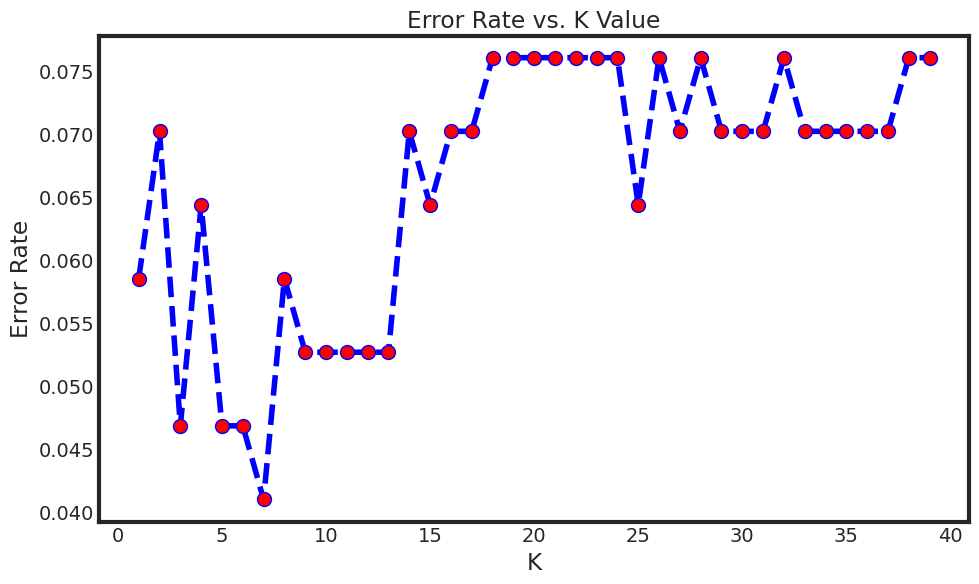

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# Define a list of models and their names
models = [LogisticRegression(), GaussianNB(),KNeighborsClassifier(n_neighbors=5),RandomForestClassifier(), SVC()]

model_names = ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbors",  "Random Forest","SVM"]

# Loop through the models and fit them to the training data, then evaluate their accuracy on the testing data
for i, model in enumerate(models):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = round(accuracy_score(Y_pred, Y_test)*100,2)
    print("Accuracy of", model_names[i], ":", accuracy, "%")

Accuracy of Logistic Regression : 97.08 %
Accuracy of Naive Bayes : 91.81 %
Accuracy of K-Nearest Neighbors : 95.32 %
Accuracy of Random Forest : 94.15 %
Accuracy of SVM : 95.32 %


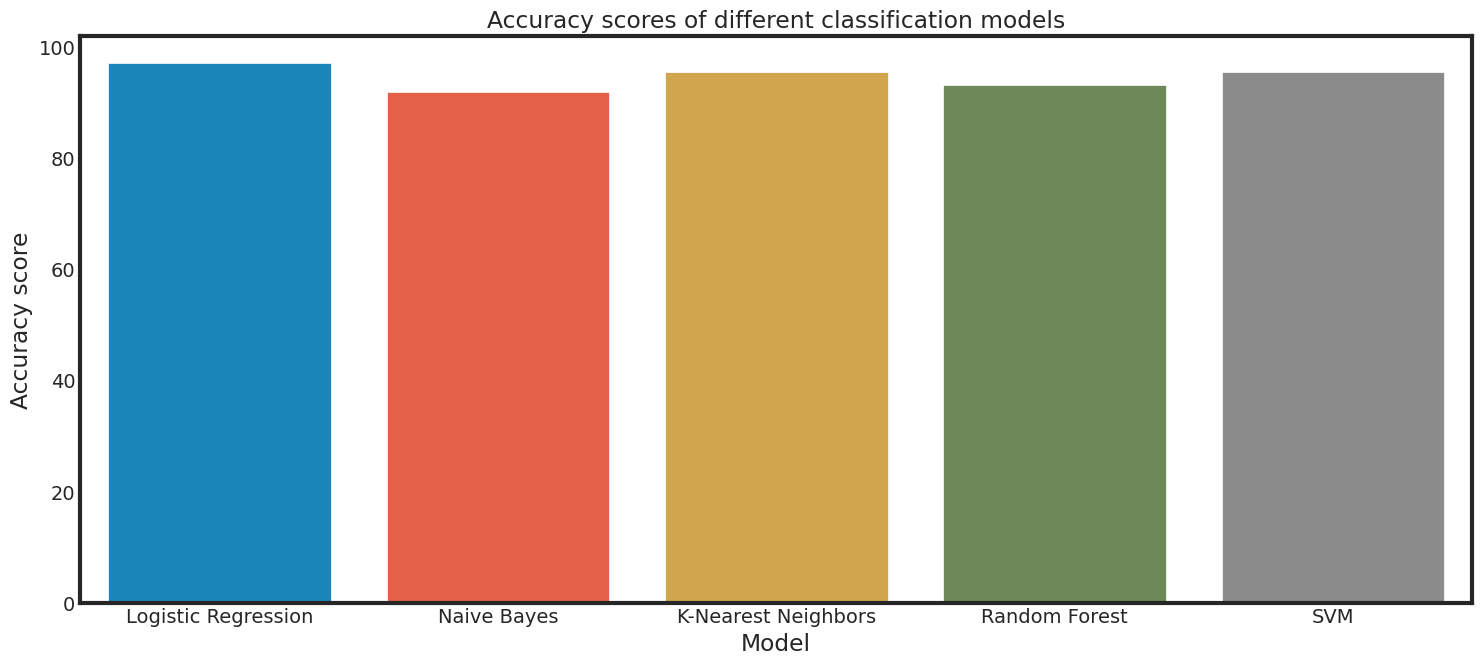

In [ ]:
import seaborn as sns
accuracy_scores=[97.08,91.81,95.32,92.98,95.32]
plt.figure(figsize=(16, 7))
sns.barplot(x=model_names, y=accuracy_scores)
plt.title("Accuracy scores of different classification models")
plt.xlabel("Model")
plt.ylabel("Accuracy score")
plt.show()

**MPORTING PICKLE FILE**

In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('/content/breastcancer_model_saved','wb'))

In [ ]:
model_loaded=pickle.load(open('/content/breastcancer_model_saved','rb'))